In [7]:
import scipy.io as scio
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
FILE_NAMES = []

for root, dirs, files in os.walk("data/", topdown=False):
    for file_Name in files:
        FILE_NAMES.append(os.path.join(root, file_Name))

FILE_NAMES.sort()
FILE_NAMES

['data/00-Normal.mat',
 'data/07-Ball.mat',
 'data/07-InnerRace.mat',
 'data/07-OuterRace6.mat',
 'data/14-Ball.mat',
 'data/14-InnerRace.mat',
 'data/14-OuterRace6.mat',
 'data/21-Ball.mat',
 'data/21-InnerRace.mat',
 'data/21-OuterRace6.mat',
 'data/process_data.csv']

In [9]:
mat = scio.loadmat(FILE_NAMES[0])
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM'])

In [10]:
key_name = list(mat.keys())[3]
DE_data = mat.get(key_name)
file_name = FILE_NAMES[0].split('/')[-1].split('.')[0]
fault = np.full((DE_data.shape[0], 1), file_name)
df_temp = pd.DataFrame({"DE data":np.ravel(DE_data), "fault":np.ravel(fault)})
df_temp


,DE data,fault
0,0.053197,00-Normal
1,0.088662,00-Normal
2,0.099718,00-Normal
3,0.058621,00-Normal
4,-0.004590,00-Normal
...,...,...
243933,-0.059664,00-Normal
243934,-0.063836,00-Normal
243935,-0.034630,00-Normal
243936,0.016689,00-Normal


In [13]:
df = pd.DataFrame(columns=["DE data", "fault"])

for file_name in FILE_NAMES:
    # continue if file_type is not .mat
    if file_name.split('.')[-1] != 'mat':
        continue
    mat = scio.loadmat(file_name)
    key_name = list(mat.keys())[3]
    DE_data = mat.get(key_name)
    file_name = file_name.split('/')[-1].split('.')[0]
    fault = np.full((DE_data.shape[0], 1), file_name)
    df_temp = pd.DataFrame({"DE data":np.ravel(DE_data), "fault":np.ravel(fault)})
    df = pd.concat([df, df_temp], ignore_index=True)

df.to_csv("data/process_data.csv", index=False)

/tmp/ipykernel_5449/1854334944.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


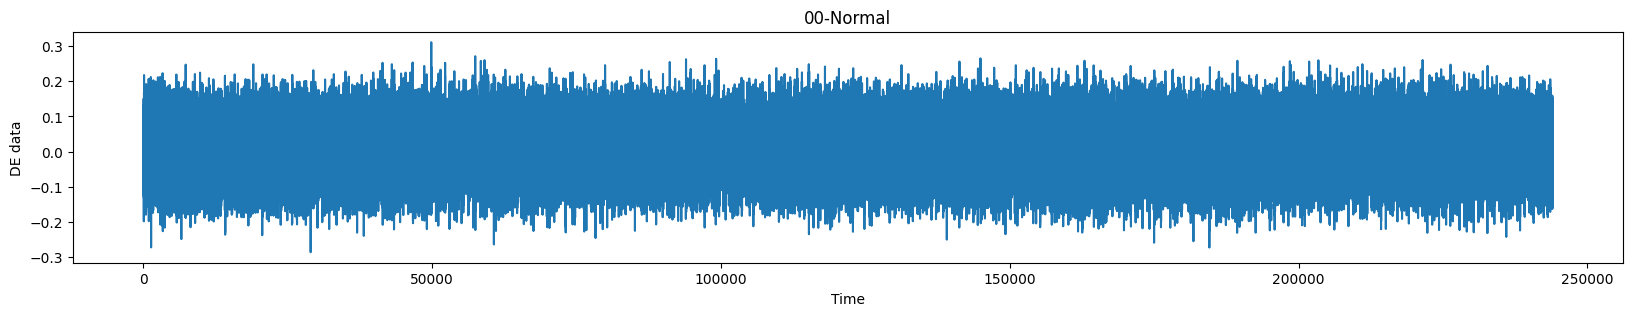

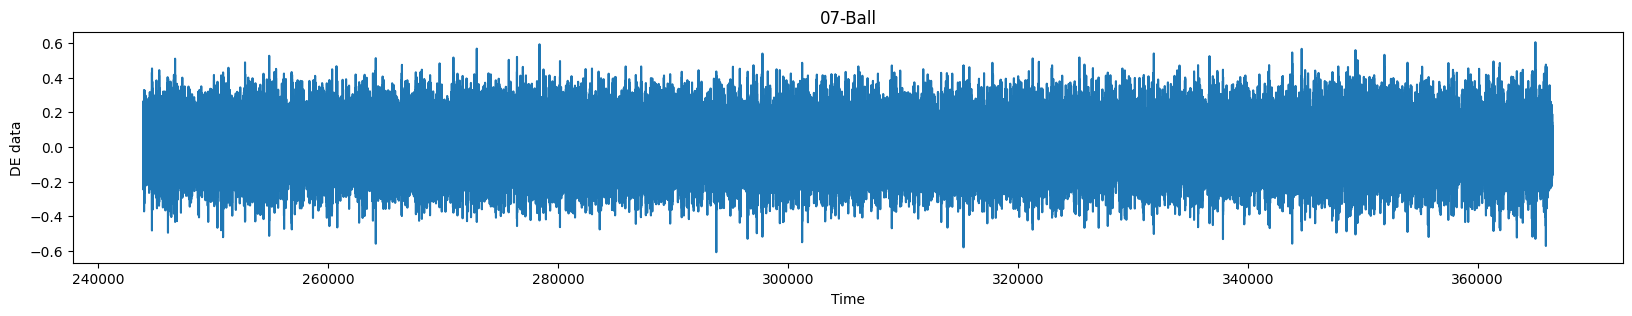

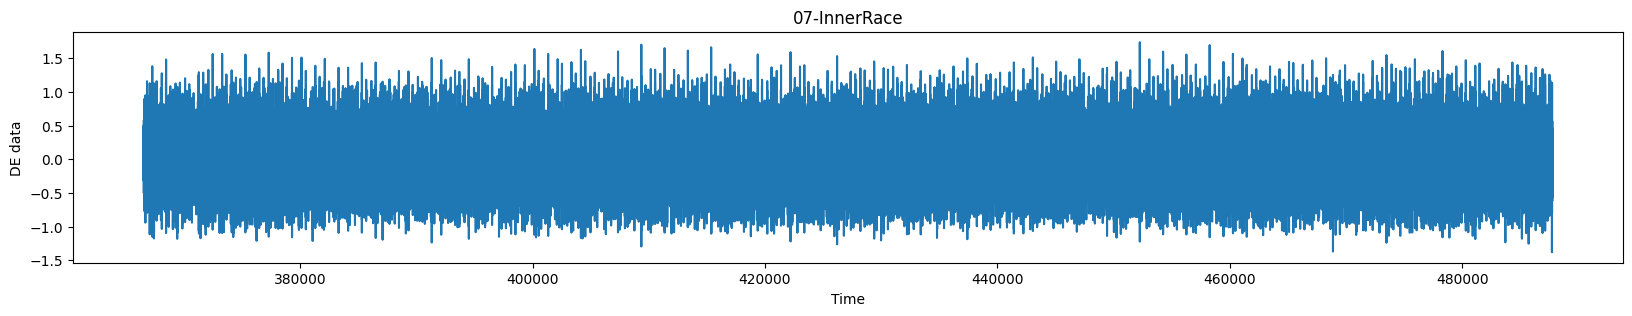

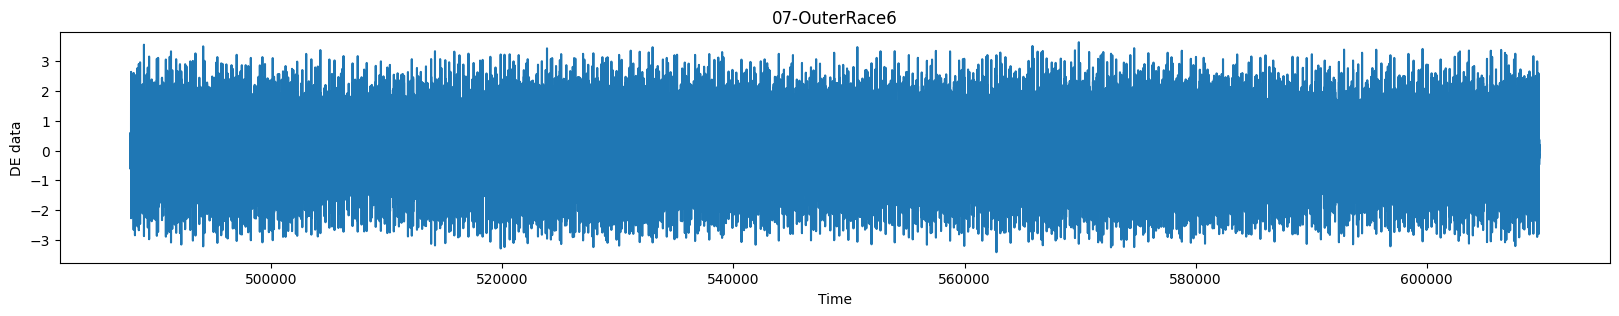

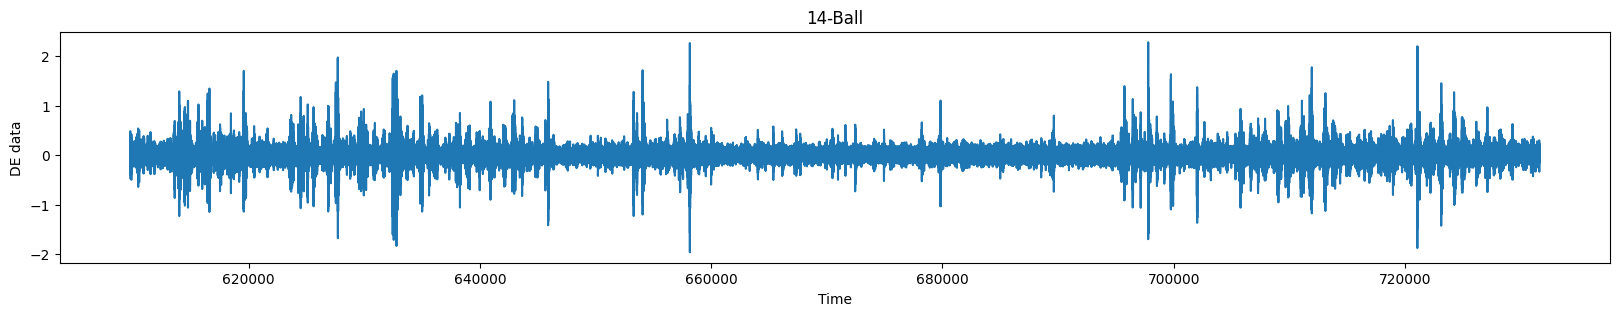

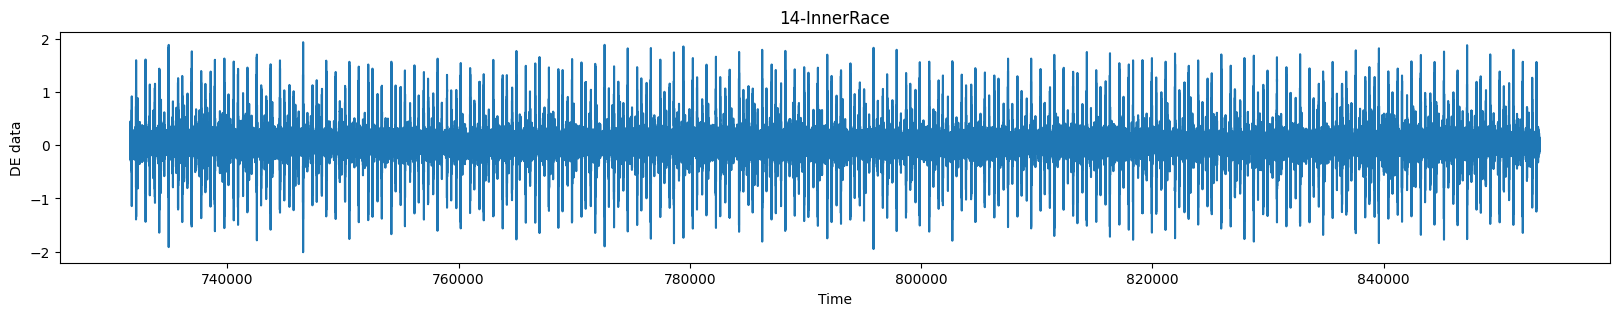

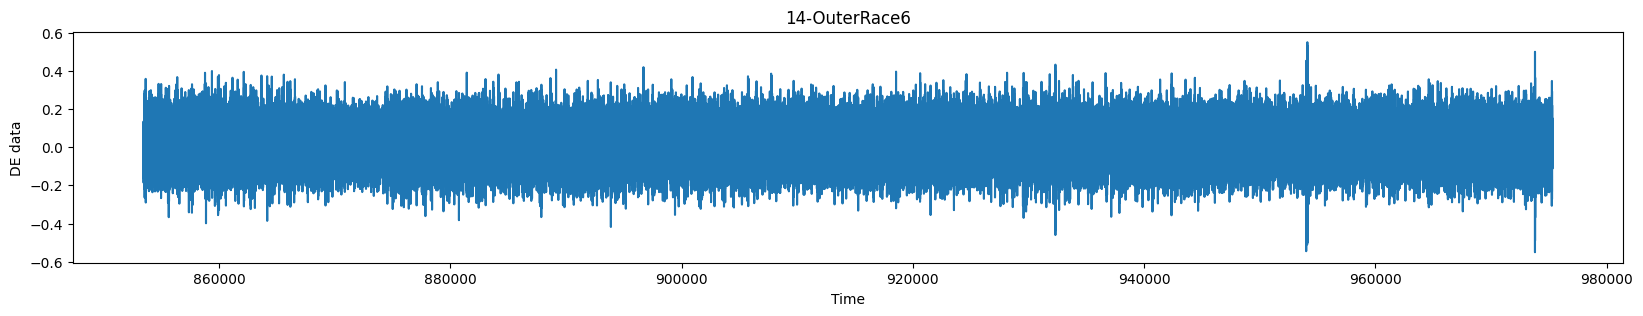

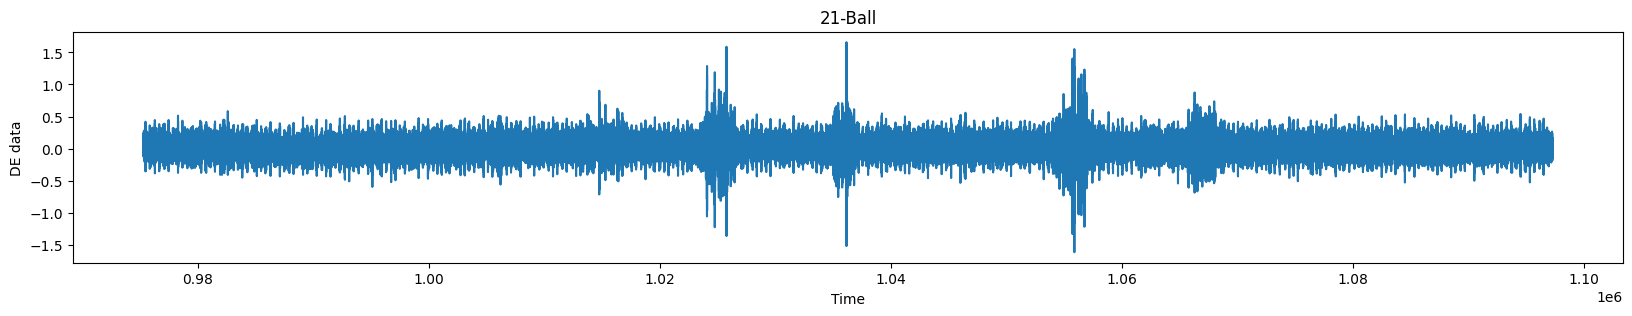

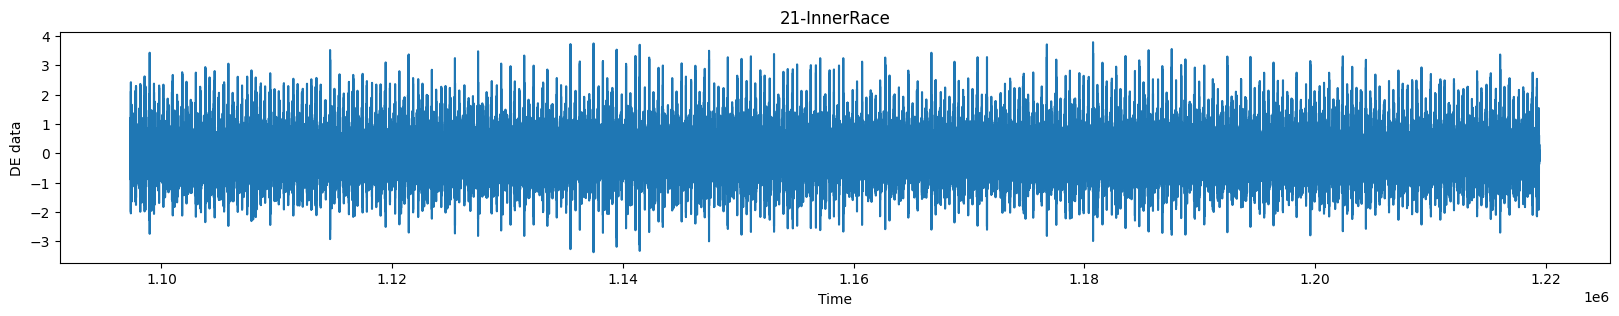

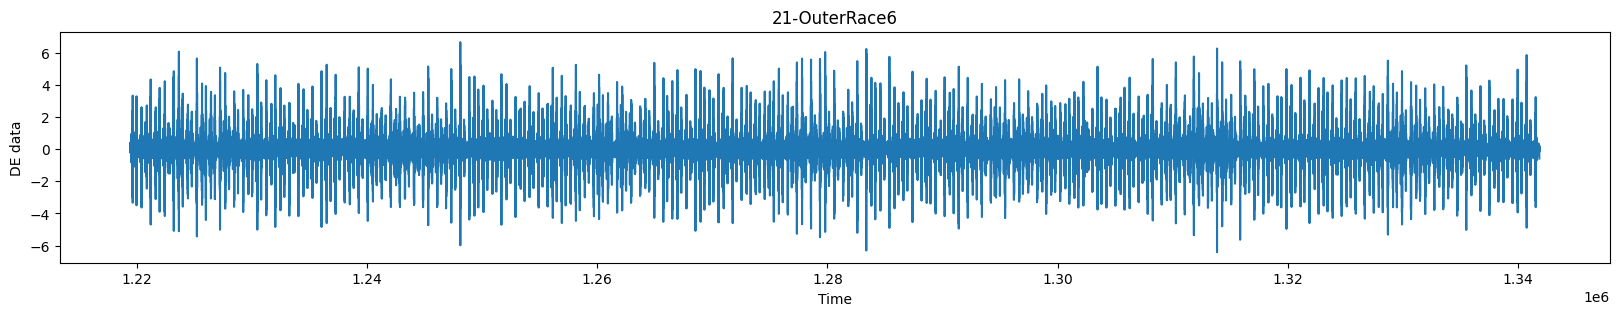

In [21]:
faults = df['fault'].unique()

for i, fault in enumerate(faults):
    plt.figure(figsize=(20, 3))
    plt.plot(df[df['fault'] == fault].iloc[:, 0])
    plt.title(fault)
    plt.xlabel('Time')
    plt.ylabel('DE data')
    # save figure to figures folder with fault name
    plt.savefig("figures/" + fault + "-input" + ".png", bbox_inches='tight')
    plt.show()


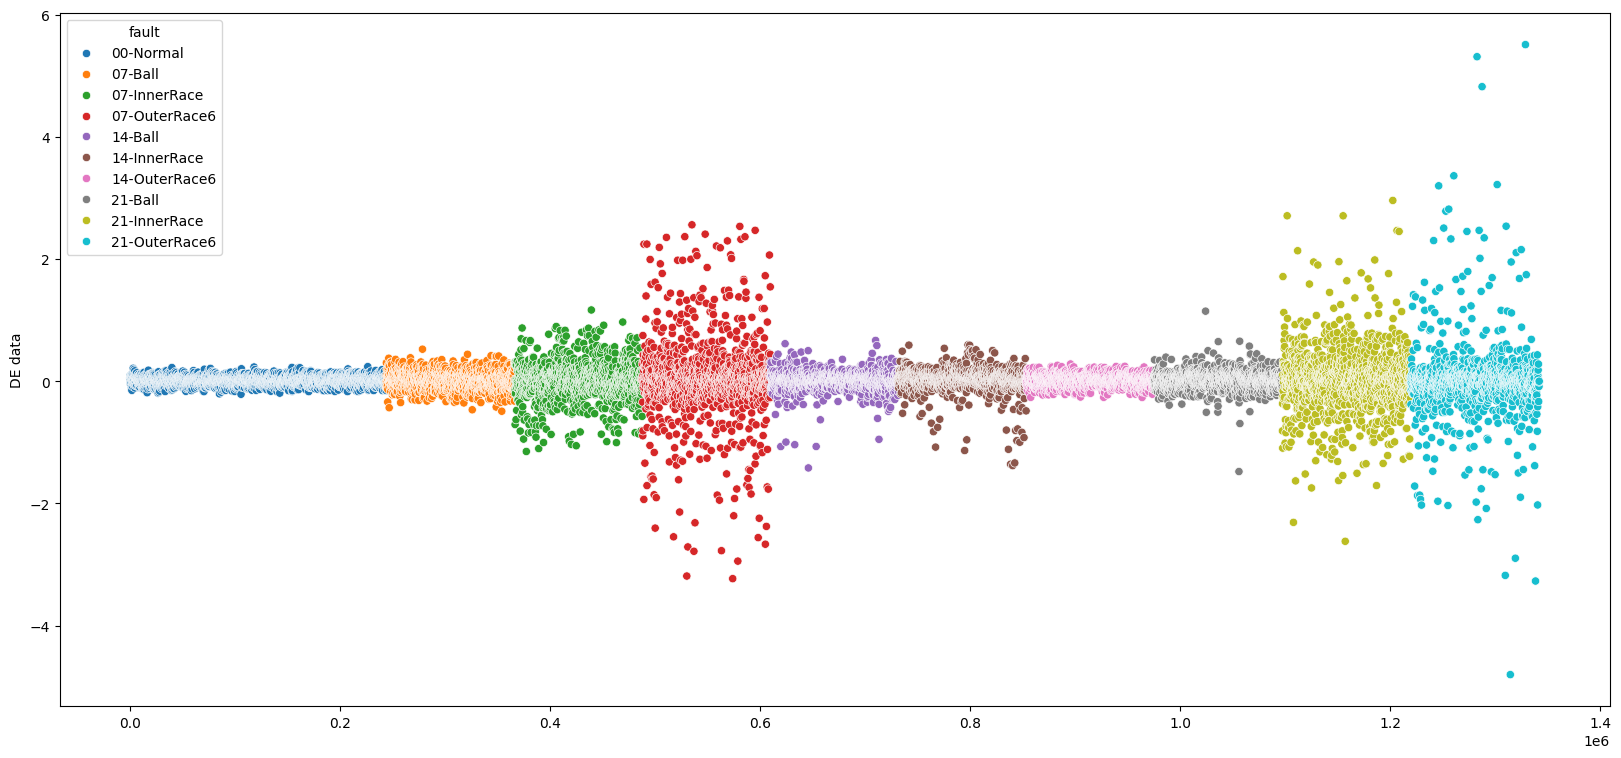

In [27]:
plt.figure(figsize=(20, 9))
sns.scatterplot(
    data=df.iloc[::100,:], 
    y='DE data', 
    x=np.arange(0, len(df), 100), 
    hue='fault'
)
# save the plot to figures
plt.savefig("figures/" + "all-faults-seaborn" + ".png", bbox_inches='tight')
